In [1]:
import os
for dirname, _, filenames in os.walk('Indian currency dataset v1'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Indian currency dataset v1\test\10\10__352.jpg
Indian currency dataset v1\test\10\10__353.jpg
Indian currency dataset v1\test\10\10__354.jpg
Indian currency dataset v1\test\10\10__355.jpg
Indian currency dataset v1\test\10\10__356.jpg
Indian currency dataset v1\test\10\10__357.jpg
Indian currency dataset v1\test\10\10__358.jpg
Indian currency dataset v1\test\10\10__359.jpg
Indian currency dataset v1\test\10\10__360.jpg
Indian currency dataset v1\test\10\10__361.jpg
Indian currency dataset v1\test\10\10__362.jpg
Indian currency dataset v1\test\10\10__363.jpg
Indian currency dataset v1\test\10\10__364.jpg
Indian currency dataset v1\test\10\10__365.jpg
Indian currency dataset v1\test\10\10__366.jpg
Indian currency dataset v1\test\10\10__367.jpg
Indian currency dataset v1\test\10\10__368.jpg
Indian currency dataset v1\test\10\10__369.jpg
Indian currency dataset v1\test\10\10__370.jpg
Indian currency dataset v1\test\10\10__371.jpg
Indian currency dataset v1\test\10\10__372.jpg
Indian curren

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [3]:
!pip install opencv-python
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['10','20','50','100','200','500','2000']

# Function to load and preprocess images
def load_and_resize_image(image_path, image_size):
    try:
        img = cv2.imread(image_path)
        if img is not None and img.size != 0:  # Check if the image is loaded and not empty
            img = cv2.resize(img, (image_size, image_size))
            return img
        else:
            print(f"Error loading or resizing image: {image_path}")
            return None
    except Exception as e:
        print(f"Error processing image: {image_path} - {e}")
        return None

# Load and preprocess training images
for label in labels:
    folderPath = os.path.join('Indian currency dataset v1/training', label)
    for j in os.listdir(folderPath):
        img = load_and_resize_image(os.path.join(folderPath, j), image_size)
        if img is not None:
            X_train.append(img)
            Y_train.append(label)

# Load and preprocess testing images
for label in labels:
    folderPath = os.path.join('Indian currency dataset v1/test', label)
    for j in os.listdir(folderPath):
        img = load_and_resize_image(os.path.join(folderPath, j), image_size)
        if img is not None:
            X_train.append(img)
            Y_train.append(label)

X_train = np.array(X_train)
Y_train = np.array(Y_train)


Error loading or resizing image: Indian currency dataset v1/training\10\.ipynb_checkpoints
Error loading or resizing image: Indian currency dataset v1/training\200\.ipynb_checkpoints


In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape


(3299, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(7,activation='softmax'))

C:\Users\Fardin Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 10, 10, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,448,583 (16.97 MB)

 Trainable params: 4,448,583 (16.97 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=5,validation_split=0.1)

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.1390 - loss: 4.7859 - val_accuracy: 0.1448 - val_loss: 1.9455
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.1172 - loss: 1.9472 - val_accuracy: 0.1852 - val_loss: 1.9399
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.1747 - loss: 1.9301 - val_accuracy: 0.1582 - val_loss: 1.9456
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.1543 - loss: 1.9452 - val_accuracy: 0.1279 - val_loss: 1.9458
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 170s 2s/step - accuracy: 0.1327 - loss: 1.9455 - val_accuracy: 0.1279 - val_loss: 1.9454


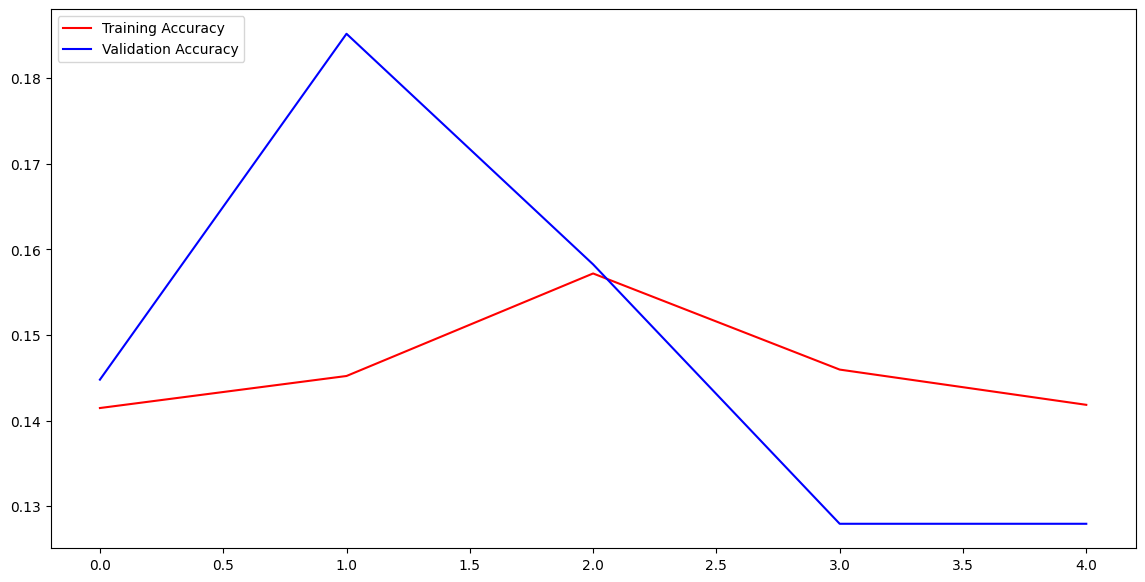

In [12]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

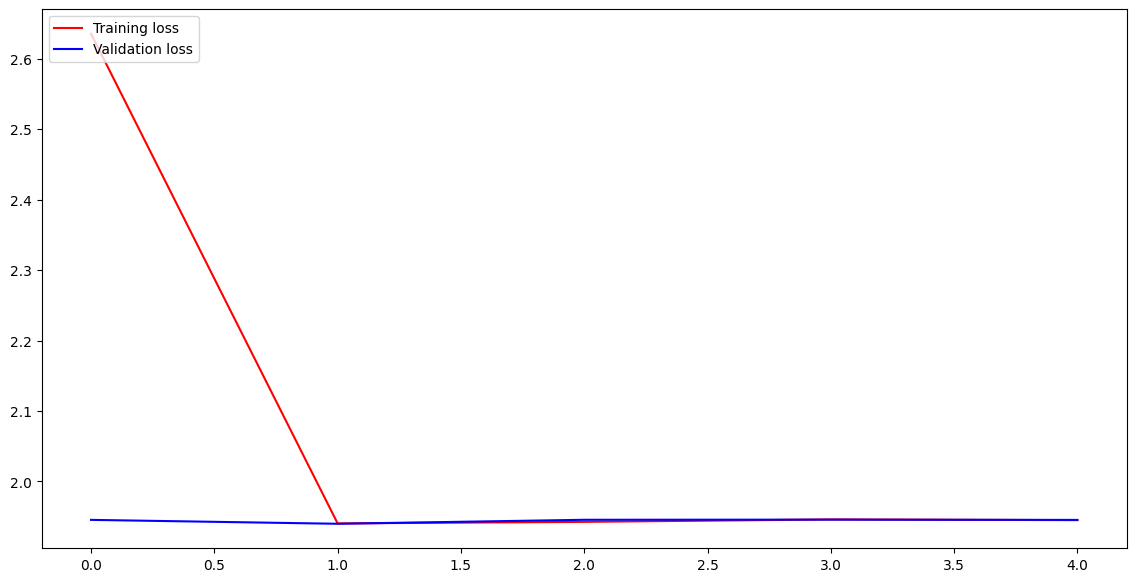

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [14]:
img = cv2.imread('10 rupee.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [15]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

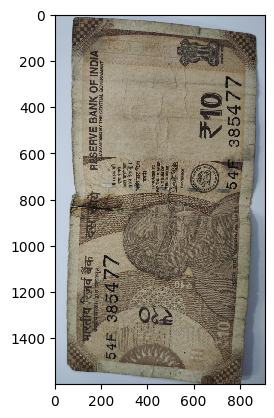

In [16]:
from tensorflow.keras.preprocessing import image
img = image.load_img('10 rupee.jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [17]:
a=model.predict(img_array)
indices = a.argmax()
print("0. 10 ")
print("1. 20")
print("2. 50")
print("3. 100")
print("4. 200")
print("5. 500")
print("6. 2000")
print("7.Fake note")
indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
0. 10 
1. 20
2. 50
3. 100
4. 200
5. 500
6. 2000
7.Fake note


1

C:\Users\Fardin Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Fardin Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Fardin Khan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


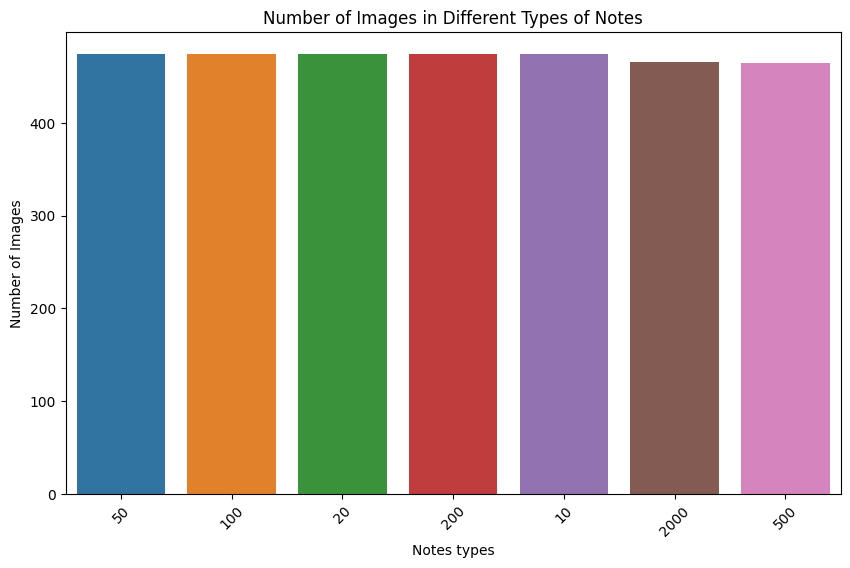

In [18]:
import pandas as pd
image_counts = pd.Series(Y_train).value_counts()
import seaborn as sns

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=image_counts.index, y=image_counts.values)
plt.title('Number of Images in Different Types of Notes')
plt.xlabel('Notes types')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()